In [8]:
import pandas as pd

In [9]:
dataToPlot = ['cpuUsage', 'memoryUsage']
folders = ['3600s']

In [26]:
hardware = '8CPU_20RAM'

In [29]:
hardware = '12CPU_30RAM'

In [11]:
tests = ['2repl', '4repl', '6repl', '8repl', '10repl']

In [17]:
tests = ['trans_60s', 'trans_120s', 'trans_180s', 'trans_240s', 'trans_300s']

In [22]:
tests = ['req_20ms', 'req_100ms', 'req_500ms', 'req_1000ms', 'req_2000ms']

In [27]:
tests = ['A1_100-A2_100-A3_100', 'A1_200-A3_100', 'A2_200', 'A2_200-A3_100', 'A3_200']

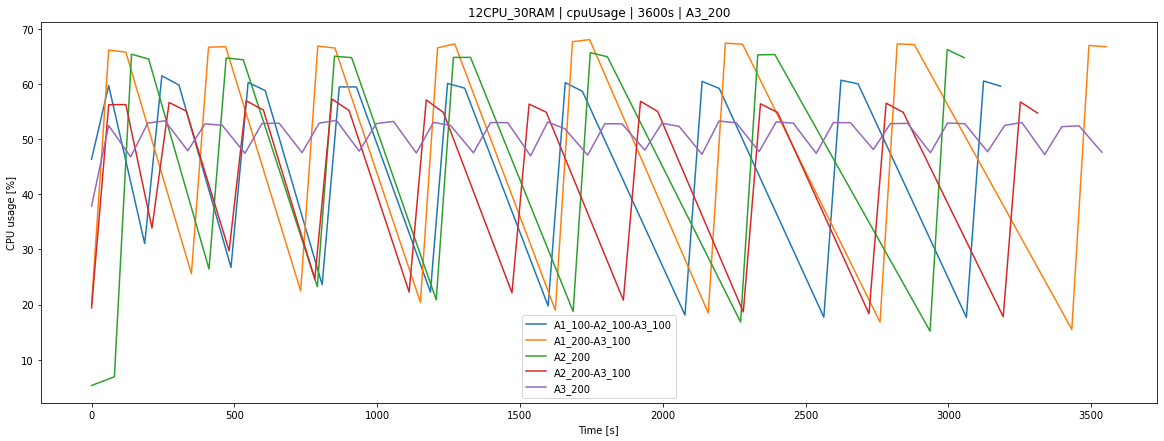

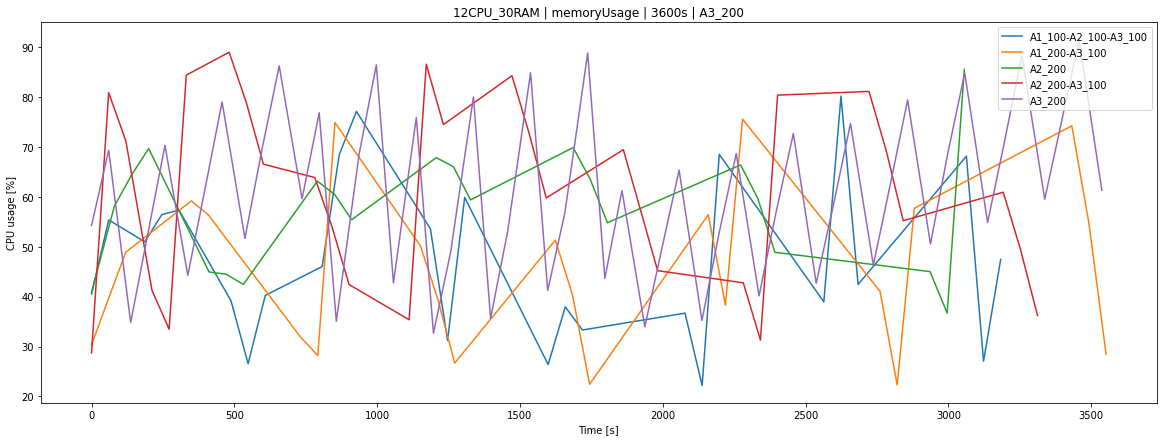

In [30]:
for f in folders:
    for j in dataToPlot:
        data = pd.DataFrame()
        for i in tests:
            try:
                d = pd.read_csv(hardware + '/' + f + '/' + i + '/traffic.csv', usecols=['timestamp', j])
            except:
                continue
            d = d.sort_values(by=['timestamp'])
            t = d['timestamp'][0]
            d['timestamp'] = d['timestamp'].apply(lambda x: (x - t)/1000)
            d[j] = d[j].apply(lambda x: x*100)

            customDataFrame = pd.DataFrame({'timestamp': d['timestamp'], i: d[j]})
            customDataFrame = customDataFrame.loc[customDataFrame['timestamp'] < 3600]
            
            data = pd.concat([data, customDataFrame])
        ax = data.set_index('timestamp').plot(figsize=(20, 7), title = hardware + ' | ' + j + ' | ' + f + ' | ' + i)
        ax.set_xlabel("Time [s]")
        ax.set_ylabel("CPU usage [%]")